<h1 align=center> Calculation of Thermal Stress Evolution in Asphalt Concrete Slabs </h1>

## Global layers properties

1. Asphalt Concrete mixture *AC* properties:
    - $k_{AC}$: thermal conductivity of asphalt concrete [W/(m.K)]
    - $\alpha_{AC}$: thermal diffusivity of asphalt concrete [m²/s]
    
    
2. Granular Base *GB* properties:
    - $k_{GB}$: thermal conductivity of aggregates [W/(m.K)]
    - $\alpha_{GB}$: thermal diffusivity of aggregates [m²/s]
    
    
3. Asphalt Concrete layer depth $z$ [cm]


4. Temperature of Asphalt Concrete layer:
    - $T_{min}$: minimum temperature of the slab [ºC]
    - $T_{max}$: maximum temperature of the slab [ºC]
    - $T_{mean}$: mean (equilibrium) temperature of the slab [ºC]

In [1]:
import math
import cmath
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
#import matplotlib as mpl

In [2]:
#%matplotlib qt
%matplotlib inline

In [3]:
from func import paramin, indexin

In [4]:
correct=''

while correct!='y' and correct!='Y':
        
    default=str(input('\nDo you want to use example material properties? (Y/n)\n'))
            
    if default=='n' or default=='N':

        kac=paramin('\nThermal conductivity AC [W/(m.K)] = ')
        aac=paramin('Thermal diffusivity AC [m^2/s] = ')
        kgb=paramin('Thermal conductivity GB [W/(m.K)] = ')
        agb=paramin('Thermal diffusivity GB [m^2/s] = ')

        z_cm=paramin('\nAsphalt Concrete layer thickness [cm] = ')

        tmax=paramin('\nMax temperature [ºC]= ')
        tmin=paramin('Min temperature [ºC]= ')
        tmean=paramin('Mean temperature [ºC]= ')
        
    else:

        # AC prop default values
        kac=0.0021
        aac=1.38

        # Agg prop default values
        kgb=0.003
        agb=1

        # AC layer thickness example value
        z_cm=12.5

        # Temperature example values
        tmax=21
        tmin=10
        tmean=16

        print('\nThermal conductivity AC [W/(m.K)] =',kac)
        print('Thermal diffusivity AC [m^2/s] =',kgb)
        print('Thermal conductivity AGG [W/(m.K)] =',aac)
        print('Thermal diffusivity AGG [m^2/s] =',agb)
        
        print('\nAsphalt Concrete layer thickness [cm] =',z_cm)
        
        print('\nMax temperature [ºC] =',tmax)
        print('Min temperature [ºC] =',tmin)
        print('Mean temperature [ºC] =',tmean)
        
    correct=str(input('\nIs that correct? (y/N)\n'))

z_m=z_cm/100 # layer thickness in [m]


Do you want to use example material properties? (Y/n)


Thermal conductivity AC [W/(m.K)] = 0.0021
Thermal diffusivity AC [m^2/s] = 0.003
Thermal conductivity AGG [W/(m.K)] = 1.38
Thermal diffusivity AGG [m^2/s] = 1

Asphalt Concrete layer thickness [cm] = 12.5

Max temperature [ºC] = 21
Min temperature [ºC] = 10
Mean temperature [ºC] = 16

Is that correct? (y/N)
y


## Do you have $B_{mix}$ ?
### Input:
- $B_{mix}$: Linear coefficient of thermal contraction of asphalt concrete [1/C]

## Do you have $VMA$ and $V_{eff}$ ?
### Input:
- $VMA$: Intergranular void content in aggregate [%]
- $V_{eff}$: Aggregate volume in mix [%]
- $\lambda_{BIN/AG}$: Linear coefficient of thermal contraction of Asphalt Binder and Aggregates [1/C]

### Since:
<div style='width: auto; float: center'/>
    <table align=\"center\">
        <tr><th>$B_{mix}=\frac{VMA\cdot\lambda_{BIN}+V_{eff}\cdot\lambda_{AG}}{300}$</th></tr>
    </table>
</div>

## None of this? Please enter the following
### Input: 
- $\lambda_{BIN/AG}$: Volumetric coefficient of thermal contraction of Asphalt Concrete and Aggregates [1/C]
- $Gsb$: Aggregate bulk specific gravity
- $Gb$: Binder specific gravity
- $Gmm$: Asphalt Concrete maximum specific gravity
- $AC$: Air void content [%vol.]
- $BC$: Binder content [%wt.]

### Since:
<div style='width: auto; float: center'/>
    <table align=center>
        <tr><th>$VMA=100-Gmb\cdot\frac{100-BC}{Gsb}$</th></tr>
        <tr><th>$V_{eff}=Gmb\cdot\left(\frac{100}{Gmm}-\frac{BC}{Gb}\right)$</th></tr>
    </table>
</div>

In [5]:
correct=''

while correct!='y' and correct!='Y':
    default=str(input('\nDo you want to use example mixture properties? (Y/n)\n'))

    if default=='n' or default=='N':
        bmixin=str(input('\nDo yo already have Bmix ? (Y/n)\n'))

        if bmixin=='n' or bmixin=='N':
            Vin=str(input('\nDo yo already have VMA and Veff ? (Y/n)\n'))

            if Vin=='n' or Vin=='N':
                lbin=paramin('\nlinear coeff thermal contraction Binder [1/K] = ')
                lag=paramin('linear coeff thermal contraction Agg [1/K] = ')
                gsb=paramin('\nGsb aggregate bulk specific gravity = ')
                gb=paramin('Gb binder specific gravity = ')
                gmm=paramin('Gmm asphalt mixture maximum specific gravity =')
                av=paramin('\nAir volume [%] = ')
                bc=paramin('Binder content [%] = ')

                gmb=(1-av/100)*gmm
                vma=round(100-gmb*(100-bc)/gsb,2)
                gse=(100-bc)/(100/gmm-bc/gb)
                veff=round(gmb*(100-bc)/gse,2)
                #veff=round(gmb*(100/gmm-bc/gb),2)
                bmix=(vma*lbin+veff*lag)/300

            else:
                lbin=paramin('\nlinear coeff thermal contraction Binder [1/K] = ')
                lag=paramin('linear coeff thermal contraction Agg [1/K] = ')
                vma=paramin('\nVMA  intergranular void content in aggregate [%] = ')
                veff=paramin('Veff aggregate volume in mix [%] = ')

            bmix=(vma*lbin+veff*lag)/300
            print('\nBmix linear coefficient of thermal contraction of asphalt mix [1/C] = '+f'{bmix:.3e}')

        else:
            bmix=paramin('Bmix linear coefficient of thermal contraction of asphalt mix [1/C] = ')

    else:
        bmix=2.351e-05   
        print('\nBmix linear coefficient of thermal contraction of asphalt mix [1/C] = '+f'{bmix:.3e}')
    
    correct=str(input('\nIs that correct? (y/N)\n'))


Do you want to use example mixture properties? (Y/n)


Bmix linear coefficient of thermal contraction of asphalt mix [1/C] = 2.351e-05

Is that correct? (y/N)
y


## Temperature Profile Model
### Input:
- $t_{day}$: number of days to compute [days]

                !!! integer only !!!

- $t_{step}$: time step of the model [hours]

                !!! float OK !!!

- $z_{step}$: depth step of the model [cm]

                !!! float OK !!!

In [6]:
tday=indexin('Number of days to compute [days] = ')
tstep=paramin('Time step of the model [hours] = ')
zdiscr=paramin('Depth step of the model [cm] = ')

tday=1 # number of days to compute
tday+=1
tstep=2 # time step (in hour)
zdiscr=2.5 # depth discretization in [cm]

Number of days to compute [days] = 1
Time step of the model [hours] = 1
Depth step of the model [cm] = 1


In [7]:
p=np.array([12.8377+1.66606j,12.8377-1.66606j,12.2261+5.01272j,12.2261-5.01272j,
            10.9343+8.40967j,10.9343-8.40967j,8.77643+11.9219j,8.77643-11.9219j,
            5.22545+15.7295j,5.22545-15.7295j])

m=np.array([-868.461+15457.4j, -868.461-15457.4j, 1551.63-8439.83j, 1551.63+8439.83j,
            -858.652+2322.07j, -858.652-2322.07j, 186.327-253.322j, 186.327+253.322j,
            -10.349+4.11094j, -10.349-4.11094j])

# We should always compute 2 days and eliminate the first day
# so we avoid the discontinuity.

dhours=tday*24
tdiscr=int(dhours/tstep+1)
time=np.linspace(0,dhours,tdiscr,dtype=float)

time[0]=1e-1 # change add by Qingwen because of div/0 at first instant (for each depth)

if int(z_cm)==z_cm:
    length=z_cm
else:
    length=int(z_cm)+1
    
z=np.arange(0,length+1,zdiscr,dtype=float) # rounded depth steps in [cm]
z[-1]=z_cm # real AC thickness value in [cm] at last element
zm=z/100 # rounded depth steps in [m]
zm[-1]=z_m # real AC thickness value in [m] at last element

ftemp=np.zeros((len(time),len(zm)))

for i in range(len(time)):
    for k in range(len(zm)):
        ttemp=0
        for j in range(len(p)):
            temp0=p[j]/time[i] # here is the 0 div by time[0]
            
            r1=cmath.sqrt(temp0/kac)  # relaciona con cemento asfaltico
            r2=cmath.sqrt(temp0/kgb)  # relaciona con agregado
            mixprop=(aac*r1)/(agb*r2) # relaciona ambos
            
            ldiv=(1+mixprop.real)/(1-mixprop.real)
            
            fs=((tmax+tmin)/2)/temp0+(6*math.pi*(tmax-tmin))/(144*temp0**2+math.pi**2)
            a=(fs-tmean/temp0)/(1-ldiv*cmath.exp(2*z_m*r1))
            b=cmath.exp(zm[k]*r1)-ldiv*cmath.exp((2*z_m-zm[k])*r1)
            
            U=a*b
            FFs=temp0*U
            out=m[j]*FFs
            
            ttemp=ttemp+out.real
            
        ftemp[i,k]=ttemp+tmean

## Temperature vs. Time - at different depth


Do you wanto to plot the whole graph (Y/n)



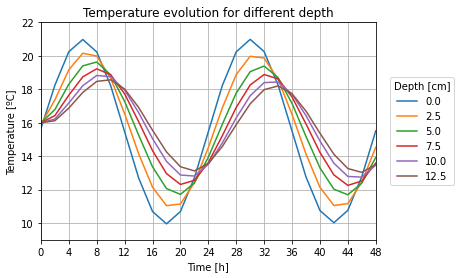


Do you want to export the data? (y/N)


Finished? (y/N)
y


In [8]:
finished=''

while finished!='y' and finished!='Y':
    
    fullplot=str(input('\nDo you wanto to plot the whole graph (Y/n)\n'))

    startplot=0
    stopplot=dhours
    kplot=2

    if fullplot=='n' or fullplot=='N':
        halfplot=str(input('\nDo you wanto to plot the graph once equilibrium is reached? (Y/n)\n'))
        kplot=1
        if halfplot=='n' or halfplot=='N':
            startplot=indexin('\nChoose a starting time [h] :')
            stopplot=indexin('\nChoose a ending time [h] :')
            kplot=0

    if kplot==2:
        time2=time
        time2[0]=0
        ftemp2=ftemp
    elif kplot==1:
        time2=time[int(24/tstep):]-24 # Recover only second day and correct time stamp
        ftemp2=ftemp[int(24/tstep):,:] # Avoid discontinuity due to div/0
    else:
        time2=time[int(startplot/tstep):int(stopplot/tstep)+1]
        ftemp2=ftemp[int(startplot/tstep):int(stopplot/tstep)+1,:]
    plt.plot(time2,ftemp2)

    plt.title('Temperature evolution for different depth')
    plt.xlabel('Time [h]')
    plt.xticks(np.arange(time2[0],time2[-1]+1,tstep*2))
    plt.xlim(time2[0],time2[-1])
    plt.ylabel('Temperature [ºC]')
    plt.ylim(round(min(ftemp2[:,0]))-1,round(max(ftemp2[:,0]))+1)
    plt.legend(z,loc='center right',bbox_to_anchor=(1.25,0.5),title='Depth [cm]')
    plt.grid(True)
    plt.show()

    exportplot=str(input('\nDo you want to export the data? (y/N)\n'))

    if exportplot=='y' or exportplot=='Y':
        exportftemp=pd.DataFrame(ftemp2,index=[time2],columns=[z])
        filepath = 'temp-profile.xlsx'
        exportftemp.to_excel(filepath,index=True,header=True)
    
    finished=str(input('\nFinished? (y/N)\n'))


## Depth vs. Temperature - at a given time


Hour of the temperature profile wanted : 2


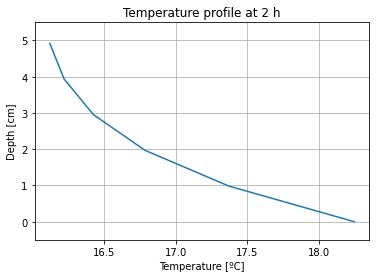


Finished? (y/N)
y


In [9]:
finished=''

while finished!='y' and finished!='Y':
    ttime=indexin('\nHour of the temperature profile wanted : ')

    #plt.plot(ftemp[int(ttime/tstep),:],z) # Depth vs Temp
    plt.plot(ftemp[int(ttime/tstep),:],z*0.3937008) # Depth_inches vs Temp

    plt.title('Temperature profile at '+str(ttime)+' h')
    plt.xlabel('Temperature [ºC]')
    #plt.xlim(min(ftemp2[int(ttime/tstep),:]),max(ftemp2[int(ttime/tstep),:]))
    plt.ylabel('Depth [cm]')
    #plt.ylim(0,round(z[-1])+1)
    plt.ylim(-0.5,round(z[-1]*0.3937008)+0.5)
    plt.grid(True)
    plt.show()

    # export in excel with automatic naming // hour
    
    finished=str(input('\nFinished? (y/N)\n'))

## Import of material data (Creep Compliance or E*)

In [10]:
datain1=''
while datain1!=1 and datain1!=2:
    datain1=indexin('What do you want to import?\n1 - Creep Compliance Data\n2 - E* Data\n')
    
datain2=''
while datain2!=1 and datain2!=2:
    datain2=indexin('What importation method do you want to use?\n1 - Excel Table Format\n2 - Clipboard Copy\n')

if datain1==1 and datain2==1:
    col_name=['temp_C','time_s','compliance_gpa^(-1)']
    datain=pd.read_excel (r'creep_compliance.xlsx')
    datain.columns=[col_name[0],col_name[1],col_name[2]]

elif datain1==2 and datain2==1:
    col_name=['temp_C','freq_hz','Edyn_gpa']
    datain=pd.read_excel (r'dynamic_modulus.xlsx')
    datain.columns=[col_name[0],col_name[1],col_name[2]]

elif datain1==1 and datain2==2:
    col_name=['temp_C','time_s','compliance_gpa^(-1)']
    while True:
        cask=input('Please copy all creep compliance data {Temperature - Time - Compliance} from your Excel file!\nONCE your data is in the clipboard, press any key\n')
        datain=pd.read_clipboard(header=None)

        if isinstance(datain.iloc[0,0], str):
            datain=datain.drop(datain.index[0])
            datain=datain.reset_index(drop=True)

        ctemp=indexin('The first column correspond to (give the number):\n 1 - Temperature (C)\n 2 - Time (sec)\n 3 - Compliance (1/GPa)\n')
        ctime_freq=indexin('The second column correspond to (give the number):\n 1 - Temperature (C)\n 2 - Time (sec)\n 3 - Compliance (1/GPa)\n')
        cmaterial=indexin('The third column correspond to (give the number):\n 1 - Temperature (C)\n 2 - Time (sec)\n 3 - Compliance (1/GPa)\n')

        datain.columns=[col_name[ctemp-1],col_name[ctime_freq-1],col_name[cmaterial-1]]

        print('Please verify your data below.')
        print(datain)
        cask=input('Is is correct? (y/N)\n')
        if cask=='y' or cask=='Y': break
            
else:
    col_name=['temp_C','freq_hz','Edyn_gpa']
    while True:
        cask=input('Please copy all E* data {Temperature - Frequency - E*} from your Excel file!\nONCE your data is in the clipboard, press any key\n')
        datain=pd.read_clipboard(header=None)

        if isinstance(datain.iloc[0,0], str):
            datain=datain.drop(datain.index[0])
            datain=datain.reset_index(drop=True)

        ctemp=indexin('The first column correspond to (give the number):\n 1 - Temperature (C)\n 2 - Frequency (Hz)\n 3 - Dynamic Modulus (GPa)\n')
        ctime_freq=indexin('The second column correspond to (give the number):\n 1 - Temperature (C)\n 2 - Frequency (Hz)\n 3 - Dynamic Modulus (GPa)\n')
        cmaterial=indexin('The third column correspond to (give the number):\n 1 - Temperature (C)\n 2 - Frequency (Hz)\n 3 - Dynamic Modulus (GPa)\n')

        datain.columns=[col_name[ctemp-1],col_name[ctime_freq-1],col_name[cmaterial-1]]

        print('Please verify your data below.')
        print(datain)
        cask=input('Is is correct? (y/N)\n')
        if cask=='y' or cask=='Y': break

What do you want to import?
1 - Creep Compliance Data
2 - E* Data
1
What importation method do you want to use?
1 - Excel Table Format
2 - Clipboard Copy
1


In [11]:
if isinstance(datain.iloc[0,2],float)==False:
    datain[col_name[cmaterial-1]]=[x.replace(',', '.') for x in datain[col_name[cmaterial-1]]]
    datain[col_name[cmaterial-1]] = datain[col_name[cmaterial-1]].astype(float)
print(datain)

    temp_C  time_s  compliance_gpa^(-1)
0      -20       1             0.045229
1      -20       2             0.046810
2      -20       5             0.049365
3      -20      10             0.051892
4      -20      20             0.055146
5      -20      50             0.059798
6      -20     100             0.064649
7      -20     200             0.070221
8      -20     500             0.079147
9      -20    1000             0.086293
10     -10       1             0.057676
11     -10       2             0.060700
12     -10       5             0.065677
13     -10      10             0.070468
14     -10      20             0.076423
15     -10      50             0.086705
16     -10     100             0.095916
17     -10     200             0.109966
18     -10     500             0.133182
19     -10    1000             0.159377
20       0       1             0.099654
21       0       2             0.107731
22       0       5             0.121974
23       0      10             0.137219


## Some information about the input data
Different plots from **creep** data:
1. creep vs time
2. log10(creep) vs log10(time)

Different plots from **dynamic modulus** data:
1. Edyn vs frequency
2. Edyn vs time
3. log10(Edyn) vs log10(time)

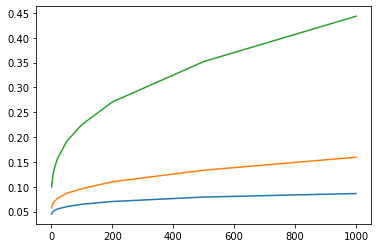

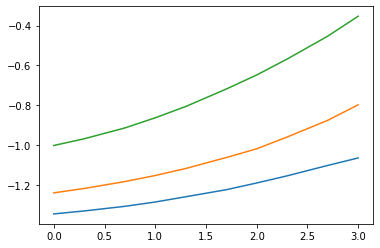

In [12]:
temparray=datain.iloc[:,0].unique()

if datain1==1:
    for k in temparray:
        tempselection=datain[datain.iloc[:,0]==k]
        plt.plot(tempselection.iloc[:,1],tempselection.iloc[:,2])
    plt.show()
    
    for k in temparray:
        tempselection=datain[datain.iloc[:,0]==k]
        plt.plot(np.log10(tempselection.iloc[:,1]),np.log10(tempselection.iloc[:,2]))
    plt.show()
    
else:
    for k in temparray:
        tempselection=datain[datain.iloc[:,0]==k]
        plt.plot(tempselection.iloc[:,1],tempselection.iloc[:,2])
    plt.show()

    for k in temparray:
        tempselection=datain[datain.iloc[:,0]==k]
        plt.plot(1/tempselection.iloc[:,1],tempselection.iloc[:,2])
    plt.show()

    for k in temparray:
        tempselection=datain[datain.iloc[:,0]==k]
        plt.plot(np.log10(1/tempselection.iloc[:,1]),np.log10(tempselection.iloc[:,2]))
    plt.show()

Optimization of 2nd order polynomial function onto log-log creep(time) data


Polynomial fit "a.x²+b.x+c" for temperature = -20 ºC
Results :
a =  0.016762007692050378 +/- 0.0005908969293155514
b =  0.04407328468372216 +/- 0.0018424940962699133
c =  -1.344916809247515 +/- 0.001189557991796078
R² = 0.9998060648489542

Polynomial fit "a.x²+b.x+c" for temperature = -10 ºC
Results :
a =  0.03243472811496347 +/- 0.0017247587169646238
b =  0.046507823900791764 +/- 0.0053780234903025815
c =  -1.2346139293533427 +/- 0.0034721794664184466
R² = 0.9992986054868952

Polynomial fit "a.x²+b.x+c" for temperature = 0 ºC
Results :
a =  0.03841515267268902 +/- 0.0005233612311514409
b =  0.10020482701830132 +/- 0.0016319088302037229
c =  -1.001511981280431 +/- 0.0010535989534306409
R² = 0.9999708182973699


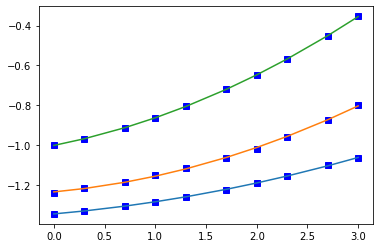

In [13]:
i=0
polyA=np.zeros((len(temparray),3))

def polylogJ(x,u,v,w):
    # define the function to optimize on log(J)-log(t) data
    return u*x**2+v*x+w

for k in temparray:
    tempselection=datain[datain.iloc[:,0]==k]
    t=np.log10(tempselection.iloc[:,1])
    CC=np.log10(tempselection.iloc[:,2])
        
    ppolyCC,pcov=curve_fit(polylogJ,t,CC)
    polyA[i,:]=ppolyCC
    CCcalc=polylogJ(t,*ppolyCC)
    print('\nPolynomial fit "a.x²+b.x+c" for temperature =',k,'ºC\nResults :')
    print('a = ',ppolyCC[0],'+/-',pcov[0,0]**0.5)
    print('b = ',ppolyCC[1],'+/-',pcov[1,1]**0.5)
    print('c = ',ppolyCC[2],'+/-',pcov[2,2]**0.5)
                
    
    residuals=CC-CCcalc
    ss_res=np.sum(residuals**2)
    ss_tot=np.sum((CC-np.mean(CC))**2)
    r_squared=1-(ss_res/ss_tot)
    print('R² = '+str(r_squared))
    #standard deviation errors on the parameters use perr = np.sqrt(np.diag(pcov))
    #print('a =', popt[0], '+/-', pcov[0,0]**0.5)
    #print('b =', popt[1], '+/-', pcov[1,1]**0.5)
    
    plt.plot(t,CC,'bs')
    plt.plot(t,CCcalc)
    i+=1
    
plt.show()

## Tref & shift
1. Chose the reference temperature
2. Calculation of mean shift to apply on other temperature data

In [14]:
tref=int(input('Chose between one the following temperature as reference temperature Tref '+str(temparray)+'\n'))
trefInd=np.where(temparray==tref)
trefInd=int(trefInd[0])
temparray2=np.delete(temparray,trefInd)

i=0
xmean=np.zeros(len(temparray2))

for k in temparray2:
    tempselection=datain[datain.iloc[:,0]==k]
    t=np.log10(tempselection.iloc[:,1])
    CC=np.log10(tempselection.iloc[:,2])
    
    shift=(-polyA[trefInd,1]+np.sqrt(polyA[trefInd,1]**2-4*polyA[trefInd,0]*(polyA[trefInd,2]-CC)))/(2*polyA[trefInd,0])
    xshift=t-shift
    
    xmean[i]=np.mean(xshift)
    i+=1
    
print(xmean)

Chose between one the following temperature as reference temperature Tref [-20 -10   0]
-20
[-1.38979493 -3.30530378]


3. Shift realized using the "Equivalent Slope Method" from [Saboo]
4. Plot the Creep Compliance Master Curve (CCMC) using this shifting method

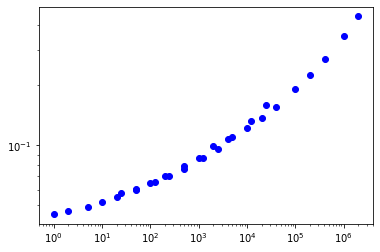

In [15]:
logtr=np.zeros(len(datain.iloc[:,0]))
tr=np.zeros(len(datain.iloc[:,0]))

for k in range(len(tr)):
    if datain.iloc[k,0]==tref:
        logtr[k]=np.log10(datain.iloc[k,1])
    for tt in range(len(temparray2)):
        if datain.iloc[k,0]==temparray2[tt]:
            logtr[k]=np.log10(datain.iloc[k,1])-xmean[tt]

tr=10**(logtr)
J=datain.iloc[:,2]
logJ=np.log10(J)

plt.plot(tr,J,'bo')
plt.yscale('log')
plt.xscale('log')
plt.show()

## Optimize log(aT) - WLF model - function
> Recover parameters plogat[0] and plogat[1]

log(at) parameters = [ 7322.52089992 45745.88541045]
R² = -1.7372495943890773


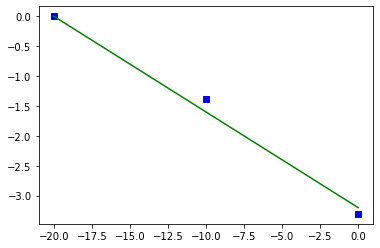

In [16]:
ylogat=np.append(xmean,0)
temparray3=np.append(temparray2,tref)

def logat(x,u,v):
    # log(at) function
    return -u*(x-tref)/(v+x-tref)

plogat,pcov=curve_fit(logat,temparray3,ylogat,bounds=(0,np.inf),method='trf')
print('log(at) parameters = '+str(plogat))

logatcalc=logat(temparray,*plogat)

residuals = ylogat- logatcalc
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ylogat-np.mean(ylogat))**2)
r_squared = 1 - (ss_res / ss_tot)
print('R² = '+str(r_squared))

plt.plot(temparray3,ylogat,'bs')
plt.plot(temparray,logatcalc,'g-')
plt.show()

## Optimize Prony Serie onto CCMC
> parameters paramJ[0]=J0 ; paramJ[1:2]={J1;tau1} ... ; paramJ[-1]=$\frac{1}{\eta_f}$

How many terms of the Prony serie do you want to use to model the CCMC?
 n = 5
Prony J serie parameters = [4.54122490e-02 1.53084920e-02 1.34990007e+00 7.88499374e-02
 5.22394543e+00 2.53585418e-02 2.80045308e+00 4.15837510e-01
 6.41147606e+00 5.24183433e-02 3.99681017e+00 7.38680350e-15]
R² = 0.9990549643949092


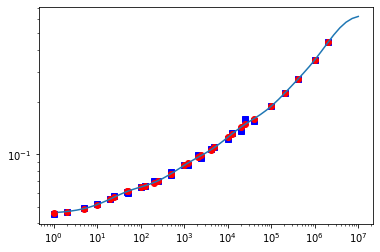

In [17]:
CC={'tr':tr,'J':J}
CCMC=pd.DataFrame(data=CC)
CCMC.sort_values(by=['tr'], inplace=True)
ttr=np.array(CCMC.iloc[:,0])
JJ=np.array(CCMC.iloc[:,1])

def make_pronyJ(nn):
    def pronyJ(x,*p):
        prony=p[0]
        for i in range(1,2*nn,2):
            prony+=p[i]*(1-np.exp(-x/10**p[i+1]))
        prony+=x*p[2*nn+1]
        return prony
    return pronyJ

nn=int(input('How many terms of the Prony serie do you want to use to model the CCMC?\n n = '))
fit_pronyJ=make_pronyJ(nn)

paramJ,pcov=curve_fit(fit_pronyJ,ttr,JJ,p0=[0.0]*(2*nn+2),bounds=(0,np.inf),method='trf')
print('Prony J serie parameters = '+str(paramJ))

Jcalc=fit_pronyJ(ttr,*paramJ)

residuals = JJ-Jcalc
ss_res = np.sum(residuals**2)
ss_tot = np.sum((JJ-np.mean(JJ))**2)
r_squared = 1 - (ss_res / ss_tot)
print('R² = '+str(r_squared))

tsim=np.logspace(0.1,7,50)
Jsim=fit_pronyJ(tsim,*paramJ)

plt.plot(ttr,JJ,'bs')
plt.plot(ttr,Jcalc,'ro')
plt.plot(tsim,Jsim)
plt.yscale('log')
plt.xscale('log')
plt.show()

## Interconvertion CCMC > E* Master Curve (EMC) [Park1999]
## Optimization of Prony Series onto EMC
> parameters paramE[0]=Gg ; paramE[1:2]={G1;tauG1} ...

How many terms of the Prony serie do you want to use to model the Dynamic Modulus E*?
 n = 7
Prony E serie parameters = [22.00580887  4.01716415  1.36296647  2.63787866  5.9546809   3.8548392
  3.89751097  2.54685604  5.00169083  1.78179065  3.06819041  1.6079369
  0.99513428  3.58188415  2.5845471 ]
R² = 0.9999984555677813


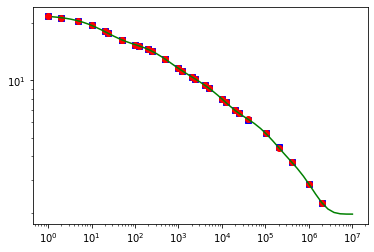

In [18]:
def make_dpronyJ(nn):
    def dpronyJ(x,*p):
        dprony=0
        for i in range(1,2*nn+1,2):
            dprony+=(p[i]/10**p[i+1])*np.exp(-x/10**p[i+1])
        dprony+=p[2*nn+1]
        return dprony
    return dpronyJ

dpronyJ1=make_dpronyJ(nn)
dpronyJ=dpronyJ1(ttr,*paramJ)

n=dpronyJ/(ttr*Jcalc)
alpha=(np.sin(n*np.pi)/(n*np.pi))**(1/n)
Dtalpha=fit_pronyJ(ttr/alpha,*paramJ)
E=1/Dtalpha

def make_pronyE(nn):
    def pronyE(x,*p):
        prony=p[0]
        for i in range(1,2*nn,2):
            prony+=p[i]*(np.exp(-x/10**p[i+1])-1)
        return prony
    return pronyE

nn2=int(input('How many terms of the Prony serie do you want to use to model the Dynamic Modulus E*?\n n = '))
fit_pronyE=make_pronyE(nn2)

paramE,pcov=curve_fit(fit_pronyE,ttr,E,p0=[0.0]*(2*nn2+1),bounds=(0,np.inf),method='trf')
print('Prony E serie parameters = '+str(paramE))

Ecalc=fit_pronyE(ttr,*paramE)

residuals = E-Ecalc
ss_res = np.sum(residuals**2)
ss_tot = np.sum((E-np.mean(E))**2)
r_squared = 1 - (ss_res / ss_tot)
print('R² = '+str(r_squared))

Esim=fit_pronyE(tsim,*paramE)

plt.plot(ttr,E,'bs')
plt.plot(ttr,Ecalc,'ro')
plt.plot(tsim,Esim,'g')
plt.yscale('log')
plt.xscale('log')
plt.show()

# INPUT FROM E* DATA

## Optimization of 1st order polynomial function (linear) onto log-log E*(time) data

## Tref & shift
1. Chose the reference temperature
2. Calculation of mean shift to apply on other temperature data

3. Shift realized using the "Equivalent Slope Method" from [Saboo]
4. Plot the Dynamic Modulus Master Curve (DMMC/EMC) using this shifting method

## Optimization of Prony Series onto EMC
> parameters paramEdyn[0]=Gg ; paramEdyn[1:2]={G1;tauG1} ...

## Linear interpolation and small discretization of time-temperature evolution

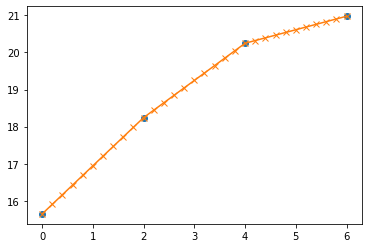

In [19]:
tinterp=np.linspace(0,time[-1],(len(time)-1)*10+1)
#tinterp[0]=time[0]
tinterp[0]=1e-4

Tinterp=np.zeros((len(tinterp),len(z)))

time0=time
time0[0]=0

for k in range(len(z)): Tinterp[:,k]=np.interp(tinterp,time0,ftemp[:,k])

plt.plot(time[0:4],ftemp[0:4,0],'o')
plt.plot(tinterp[0:31],Tinterp[0:31,0],'-x')
plt.show()

In [20]:

# WRONG > QINGWEN CHANGED IT
def ilogat(x,u,v):
    # -1/logat function! And confusion in C1/C2 param position
    return (u+x-tref)/(v*(x-tref))
    #return (v+x-tref)/(u*(x-tref)) # correction of the switch between C1 & C2 param

lat=logat(Tinterp,*plogat)
tsec=tinterp*3600

Xi=np.zeros((len(tinterp),len(z)))
Xdelta=np.zeros((len(tinterp)-1,len(z)))
Tdexi=np.zeros((len(tinterp)-1,len(z)))
Xstep=np.zeros((len(tinterp)-1,len(z)))

for k in range(len(z)):
     
    # WRONG > QINGWEN CHANGED IT
    # > log(tsec)-log(10)=log(tsec/10)!=log10(tsec)
    #Xi[:,k]=10**(np.log(tsec)-np.log(10)-lat[:,k])
    # > log10(tsec)=log(tsec)/log(10)
    #Xi[:,k]=10**(np.log(tsec/10)-lat[:,k])
    
    
    Xi[:,k]=10**(np.log10(tsec)-lat[:,k]) 
    
    Xdelta[:,k]=np.diff(Xi[:,k])
    Tdexi[:,k]=np.diff(Tinterp[:,k])/Xdelta[:,k]
    Xstep[:,k]=np.int_(Xdelta[:,k]/10)

tstress=int(input('Time you want to plot [h]?\n tstress = '))

stress=np.zeros((len(z)))

'''
for tt in range(len(tinterp)):
    if tstress>=tinterp[tt]:
        for zz in range(len(z)):
            #for k in range(int(Xstep[tt,zz])):
            for k in range(1):
                if Xdelta[tt,zz] > 0:
                    stress[zz]=+fit_pronyE((Xi[tt+1,zz]-k*10),*paramE)*Tdexi[tt,zz]*10*bmix
                else:
                    stress[zz]=+fit_pronyE((Xi[tt+1,zz]+k*10),*paramE)*Tdexi[tt,zz]*10*bmix
    else: break
'''

#Faster integration test > avoid looping on condition
        
for tt in range(len(tinterp)):
    if tstress>=tinterp[tt]:
        for zz in range(len(z)):
            c=1
            if Xdelta[tt,zz]>0: c=-1
            #for k in range(int(Xstep[tt,zz])):
            for k in range(1):
                stress[zz]+=fit_pronyE((Xi[tt+1,zz]+c*k*10),*paramE)*Tdexi[tt,zz]*10*bmix
    else: break

indexloop=np.where(tinterp>tstress)
        
print('\nThermal stress values at different depth [psi]:\n'+str(stress))
print('\nSteps to compute for 2h stress calculation:\n'+str(Xstep[0:indexloop[0][0],:]))

Time you want to plot [h]?
 tstress = 2

Thermal stress values at different depth [psi]:
[1.63608835e-12 1.14898902e-12 7.64337766e-13 4.91368256e-13
 3.01024667e-13 1.92074879e-13]

Steps to compute for 2h stress calculation:
[[3.98486000e+07 4.19650590e+07 4.23301350e+07 4.18664640e+07
  4.15535940e+07 4.14010050e+07]
 [4.78599680e+07 4.66422570e+07 4.48570180e+07 4.32084200e+07
  4.22510670e+07 4.17894470e+07]
 [5.70550420e+07 5.16869860e+07 4.74745640e+07 4.45610150e+07
  4.29361850e+07 4.21597180e+07]
 [6.76125410e+07 5.71477800e+07 5.02077260e+07 4.59455240e+07
  4.36296560e+07 4.25324540e+07]
 [7.97131840e+07 6.30552660e+07 5.30610540e+07 4.73626190e+07
  4.43315710e+07 4.29076680e+07]
 [9.35602270e+07 6.94421910e+07 5.60392660e+07 4.88129810e+07
  4.50420210e+07 4.32853750e+07]
 [1.09382161e+08 7.63435580e+07 5.91472530e+07 5.02973090e+07
  4.57611000e+07 4.36655900e+07]
 [1.27435735e+08 8.37967770e+07 6.23900860e+07 5.18163130e+07
  4.64888990e+07 4.40483270e+07]
 [1.48009317e

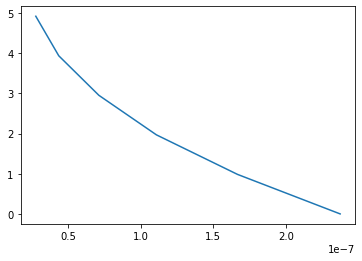

In [23]:
# Comparison w/ Qingwen : GPa > PSI & cm > in
plt.plot(stress*145038,z*0.3937008)
plt.show()

In [24]:
# Check on Xdelta values > if all false then any(Xdelta)=False

check=np.ones(zz,dtype='bool')

Xdelta[6,3]=-5

for k in range(zz):
    check[k]=any(Xdelta[:,k]<=0)

# if all check[k] false, then any(check)=False / if there's 1 Xdelta value <=0, then any(check)=True
print(any(check))

True
